## Seung Jun Choi in Urban Information Lab
### PCA and Visual Representation

# What is PCA?
https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

If you’ve worked with a lot of variables before, you know this can present problems. Do you understand the relationships between each variable? Do you have so many variables that you are in danger of overfitting your model to your data or that you might be violating assumptions of whichever modeling tactic you’re using?

“How do I take all of the variables I’ve collected and focus on only a few of them?” In technical terms, you want to “reduce the dimension of your feature space.” By reducing the dimension of your feature space, you have fewer relationships between variables to consider and you are less likely to overfit your model. (Note: This doesn’t immediately mean that overfitting, etc. are no longer concerns — but we’re moving in the right direction!)

Somewhat unsurprisingly, reducing the __dimension__ of the feature space is called --__“dimensionality reduction.”__ There are many ways to achieve dimensionality reduction, but most of these techniques fall into one of two classes:
* Feature Elimination
* Feature Extraction

__Feature Elimination__  is what it sounds like: we reduce the feature space by eliminating features.Advantages of feature elimination methods include simplicity and maintaining interpretability of your variables.

As a disadvantage, though, you gain no information from those variables you’ve dropped. By eliminating features, we’ve also entirely eliminated any benefits those dropped variables would bring.

__Feature Extraction__, however, doesn’t run into this problem. Say we have ten independent variables. In feature extraction, we create ten “new” independent variables, where each “new” independent variable is a combination of each of the ten “old” independent variables. However, we create these new independent variables in a specific way and order these new variables by how well they predict our dependent variable. You might say, “Where does the dimensionality reduction come into play?” Well, we keep as many of the new independent variables as we want, but we drop the “least important ones.” Because we ordered the new variables by how well they predict our dependent variable, we know which variable is the most important and least important. But — and here’s the kicker — because these new independent variables are combinations of our old ones, we’re still keeping the most valuable parts of our old variables, even when we drop one or more of these “new” variables! Principal component analysis is a technique for feature extraction — so it combines our input variables in a specific way, then we can drop the “least important” variables while still retaining the most valuable parts of all of the variables! _As an added benefit, each of the “new” variables after PCA are all independent of one another._ This is a benefit because the assumptions of a linear model require our independent variables to be independent of one another. If we decide to fit a linear regression model with these “new” variables (see “principal component regression” below), this assumption will necessarily be satisfied.

## When should I use PCA?
1. Do you want to reduce the number of variables, but aren’t able to identify variables to completely remove from consideration?
2. Do you want to ensure your variables are independent of one another?
3. Are you comfortable making your independent variables less interpretable?
If you answered “yes” to all three questions, then PCA is a good method to use. If you answered “no” to question 3, you should not use PCA.

## How does PCA work?

* We are going to calculate a matrix that summarizes how our variables all relate to one another.
* We’ll then break this matrix down into two separate components: direction and magnitude. We can then understand the “directions” of our data and its “magnitude” (or how “important” each direction is).
* We will transform our original data to align with these important directions (which are combinations of our original variables).
* By projecting our data into a smaller space, we’re reducing the dimensionality of our feature space… but because we’ve transformed our data in these different “directions,” we’ve made sure to keep all original variables in our model!


Before starting, you should have tabular data organized with n rows and likely p+1 columns, where one column corresponds to your dependent variable (usually denoted Y) and p columns where each corresponds to an independent variable (the matrix of which is usually denoted X).
1. If a Y variable exists and is part of your data, then separate your data into Y and X, as defined above — we’ll mostly be working with X. (Note: if there exists no column for Y, that’s okay — skip to the next point!)
2. Take the matrix of independent variables X and, for each column, subtract the mean of that column from each entry. (This ensures that each column has a mean of zero.)
3. Decide whether or not to standardize. Given the columns of X, are features with higher variance more important than features with lower variance, or is the importance of features independent of the variance? (In this case, importance means how well that feature predicts Y.) If the importance of features is independent of the variance of the features, then divide each observation in a column by that column’s standard deviation. (This, combined with step 2, standardizes each column of X to make sure each column has mean zero and standard deviation 1.) Call the centered (and possibly standardized) matrix Z.
4. Take the matrix Z, transpose it, and multiply the transposed matrix by Z. (Writing this out mathematically, we would write this as ZᵀZ.) The resulting matrix is the covariance matrix of Z, up to a constant.
5. (This is probably the toughest step to follow — stick with me here.) Calculate the eigenvectors and their corresponding eigenvalues of ZᵀZ. This is quite easily done in most computing packages— in fact, the eigendecomposition of ZᵀZ is where we decompose ZᵀZ into PDP⁻¹, where P is the matrix of eigenvectors and D is the diagonal matrix with eigenvalues on the diagonal and values of zero everywhere else. The eigenvalues on the diagonal of D will be associated with the corresponding column in P — that is, the first element of D is λ₁ and the corresponding eigenvector is the first column of P. This holds for all elements in D and their corresponding eigenvectors in P. We will always be able to calculate PDP⁻¹ in this fashion. (Bonus: for those interested, we can always calculate PDP⁻¹ in this fashion because ZᵀZ is a symmetric, positive semidefinite matrix.)
6. Take the eigenvalues λ₁, λ₂, …, λp and sort them from largest to smallest. In doing so, sort the eigenvectors in P accordingly. (For example, if λ₂ is the largest eigenvalue, then take the second column of P and place it in the first column position.) Depending on the computing package, this may be done automatically. Call this sorted matrix of eigenvectors P*. (The columns of P* should be the same as the columns of P, but perhaps in a different order.) Note that these eigenvectors are independent of one another.
7. Calculate Z* = ZP*. This new matrix, Z*, is a centered/standardized version of X but now each observation is a combination of the original variables, where the weights are determined by the eigenvector. As a bonus, because our eigenvectors in P are independent of one another, each column of Z* is also independent of one another!

__Because our principal components are orthogonal to one another, they are statistically linearly independent of one another… which is why our columns of Z* are linearly independent of one another!__

8. Finally, we need to determine how many features to keep versus how many to drop. There are three common methods to determine this.

* Method 1: We arbitrarily select a number of principal components to include. Suppose I wanted to keep five principal components in my model. In the genetic data case above, these five principal components explains about 66% of the total variability that would be explained by including all 13 principal components.
* Method 2: Suppose I wanted to include enough principal components to explain 90% of the total variability explained by all 13 principal components. In the genetic data case above, I would include the first 10 principal components and drop the final three variables from Z*.
* Method 3: Here, we want to “find the elbow.” In the scree plot above, we see there’s a big drop in proportion of variability explained between principal component 2 and principal component 3. In this case, we’d likely include the first two features and drop the remaining features. As you can see, this method is a bit subjective as “elbow” doesn’t have a mathematically precise definition and, in this case, we’d include a model that explains only about 42% of the total variability.

# Mathematics of PCA

https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch18.pdf

We start with $p$-dimensional vectors, and want to summarize them by projecting down into a $q$-dimensional subspace. Our summary will be the projection of the
original vectors on to $q$ directions, the principal components, which span the subspace.

There are several equivalent ways of deriving the principal components mathematically. __The simplest one is by finding the projections which maximize the variance.__ The first principal component is the direction in space along which projections have the largest variance. The second principal component is the direction which maximizes variance among all directions orthogonal to the first. The $k$th component is the variance-maximizing direction orthogonal to the previous $k − 1$ components. __There are $p$ principal components in all.__

__Rather than maximizing variance, it might sound more plausible to look for the projection with the smallest average (mean-squared) distance between the original
vectors and their projections on to the principal components; this turns out to be equivalent to maximizing the variance.__

Throughout, assume that the data have been “centered”, so that every variable has mean 0. If we write the centered data in a matrix __X__, where rows are objects and columns are variables, then $\mathbf{X}^T \mathbf{X} = n \mathbf{V}$, where $\mathbf{V}$ is the covariance of the data.

### Minimizing Projection Residuals

We’ll start by looking for a one-dimensional projection. That is, we have $p$-dimensional vectors, and we want to project them on to a line through the origin. We can specify the line by a unit vector along it, $\mathbf{w}$, then the projection of a data vector $\mathbf{x}_i$ on to the line is $\mathbf{x}_i\cdot\mathbf{w}$, which is a scalar This is the distance of the projection from the origin; the actual coordinate in $p$-dimensional space is $(\mathbf{x}_i.\mathbf{w}) \mathbf{w}$. The mean of the projections will be zero, because the mean of the vectors $\mathbf{x}_i$ is zero:


$$ \frac{1}{n} \sum_{i=1}^n (\mathbf{x}_i.\mathbf{w})\mathbf{w} = \left(\left(\frac{1}{n}\sum_{i=1}^n \mathbf{x}_i\right).\mathbf{w}\right)\mathbf{w}$$

If we try to use our projected or image vectors instead of our original vectors, there will be some error, because (in general) the images do not coincide with the
original vectors. (When do they coincide?) The difference is the error or residual of the projection. How big is it? For any one vector, $\mathbf{x}_i$, it is

$$|| \mathbf{x}_i - (\mathbf{w}. \mathbf{x}_i)\mathbf{w}||_2 = \mathbf{x}_i . \mathbf{x}_i -(\mathbf{w}.\mathbf{x}_i)^2.$$

since $\mathbf{w}.\mathbf{w} = 1$, we have

$$ MSE(\mathbf{w}) = \frac{1}{n} \sum_{i=1}^n ||\mathbf{x}_i||_2 -(\mathbf{w}-\mathbf{x}_i)^2 = \frac{1}{n}\left( \sum_{i=1}^n ||\mathbf{x}_i||_2-\sum_{i=1}^n (\mathbf{w}.\mathbf{x}_i)^2 \right)$$

To make the MSE small, what we must do is make the second sum big, i.e., we want to maximize
$$\sum_{i=1}^n (\mathbf{w}.\mathbf{x}_i)^2$$

which we can see is the sample mean of $(\mathbf{w}.\mathbf{x}_i)^2$. The mean of a square is always equal to the square of the mean plus the variance:
$$\sum_{i=1}^n (\mathbf{w}.\mathbf{x}_i)^2 = \left(\sum_{i=1}^n (\mathbf{w}.\mathbf{x}_i)\right)^2 + var [\mathbf{w}\mathbf{x}_i]$$

Since we’ve just seen that the mean of the projections is zero, minimizing the residual sum of squares turns out to be equivalent to maximizing the variance of the projections.

### Maximizing Variance

We stack our $n$ data vectors into an $n × p$ matrix, $\mathbf{X}$, then the projection $\mathbf{X} \mathbf{w}$ is an $n\ X\ 1$ matriix. The variance is

$$\sigma_{\mathbf{w}}^2 =\frac{1}{n} (\mathbf{X} \mathbf{w})^T (\mathbf{X} \mathbf{w})  = \mathbf{w}^T  \frac{\mathbf{X}^T \mathbf{X}}{n}  \mathbf{w}  = \mathbf{w}^T \mathbf{V} \mathbf{w} .$$


We want to chose a unit vector $w$ so as to maximize $\sigma_{\mathbf{w}}^2$. We use the following objective function (This is a Lagrange Multipliers Problem with the constraint that $\mathbf{w}^T\mathbf{w}=1$)
$$ L (\mathbf{w}, \lambda) \equiv \sigma_{\mathbf{w}}^2 - \lambda (\mathbf{w}^T\mathbf{w}-1)$$
$$\frac {\partial L}{\partial \lambda} = \mathbf{w}^T\mathbf{w}-1$$
$$\frac {\partial L}{\partial  \mathbf{w}} = 2\mathbf{V} \mathbf{w} - 2 \lambda \mathbf{w}. $$

Setting the derivatives to zero at the optimum, we get
$$\mathbf{w}^T\mathbf{w}=1$$
$$\mathbf{V} \mathbf{w}=\lambda \mathbf{w}.$$

Thus, desired vector $\mathbf{w}$ is an eigenvector of the covariance matrix $\mathbf{V}$, and the maximizing vector will be the one associated with the largest eigenvalue $\lambda$. This is good news, because finding eigenvectors is something which can be done comparatively rapidly.

The eigenvectors of $\mathbf{V}$ are the principal components of the data. We know that they are all orthogonal to each other for a symmetric positive definite matrix, so together they span the whole p-dimensional space. The first principal component, i.e. the eigenvector which goes the largest value of$\lambda$  , is the direction along which the data have the most variance. The second principal component, i.e. the second eigenvector, is the direction orthogonal to the first component with the most variance. Because it is orthogonal to the first eigenvector, their projections will be uncorrelated. In fact, projections on to all the principal components are uncorrelated with each other. If we use _q_ principal components, our weight matrix  will be a _p × q_ matrix, where
each column will be a different eigenvector of the covariance matrix $\mathbf{V}$ . The eigenvalues will give the total variance described by each component. The variance of the projections on to the first q principal components is then $\sum_{i=1}^q \lambda_i$.

# Principal Component Analysis - Implementation

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

__Principal component analysis__ is a fast and flexible unsupervised method for dimensionality reduction in data, which we saw briefly in Introducing Scikit-Learn. Its behavior is easiest to visualize by looking at a two-dimensional dataset. Consider the following 200 points:

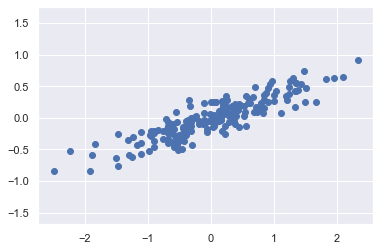

In [46]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T #first rand is (0,1], second is random normal
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

By eye, it is clear that there is a nearly linear relationship between the x and y variables. This is reminiscent of the linear regression data we explored in In Depth: Linear Regression, but the problem setting here is slightly different: rather than attempting to predict the y values from the x values, the unsupervised learning problem attempts to learn about the relationship between the x and y values.

In principal component analysis, this relationship is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset. Using Scikit-Learn's PCA estimator, we can compute this as follows:

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

The fit learns some quantities from the data, most importantly the "components" and "explained variance":

In [48]:
print('PCA Components: {}'.format(pca.components_))
print('Explained Variance {}'.format(pca.explained_variance_))

PCA Components: [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
Explained Variance [0.7625315 0.0184779]


To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

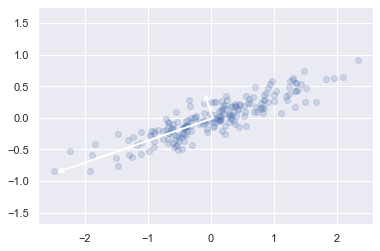

In [49]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

These vectors represent the principal axes of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the "principal components" of the data.

If we plot these principal components beside the original data, we see the plots shown here:

# Principal Components Rotation

[Text(0.5, 0, 'component 1'),
 Text(0, 0.5, 'component 2'),
 Text(0.5, 1.0, 'principal components'),
 (-5.0, 5.0),
 (-3.0, 3.1)]

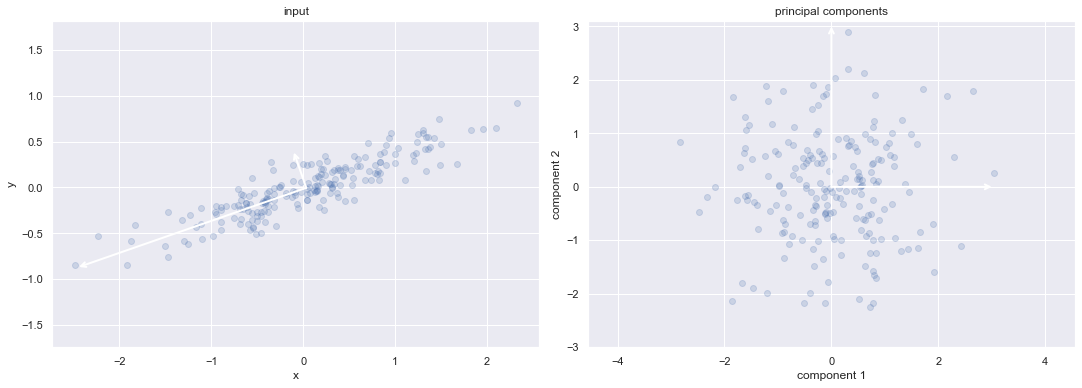

In [50]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))

#fig.savefig('figures/05.09-PCA-rotation.png')

This transformation from data axes to principal axes is an affine transformation, which basically means it is composed of a translation, rotation, and uniform scaling.

While this algorithm to find principal components may seem like just a mathematical curiosity, it turns out to have very far-reaching applications in the world of machine learning and data exploration.

## PCA as dimensionality reduction
Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Here is an example of using PCA as a dimensionality reduction transform:

In [51]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


The transformed data has been reduced to a single dimension. To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

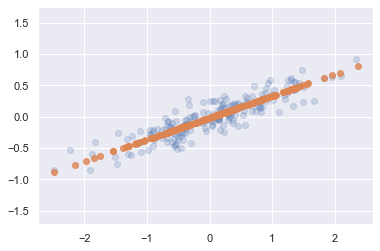

In [52]:
X_new = pca.inverse_transform(X_pca) #Dot the transformed data with the eigenvector
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version. This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance. The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

## PCA for visualization: Hand-written digits
The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data. To see this, let's take a quick look at the application of PCA to the digits data we saw in In-Depth: Decision Trees and Random Forests.

We start by loading the data:

In [53]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Recall that the data consists of 8×8 pixel images, meaning that they are 64-dimensional. To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

In [54]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


We can now plot the first two principal components of each point to learn about the data:

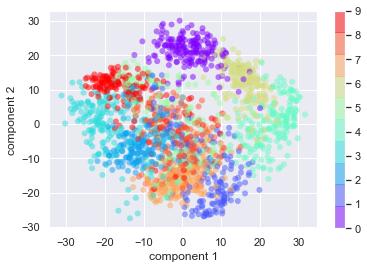

In [55]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance. Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.

## What do the components mean?
We can go a bit further here, and begin to ask what the reduced dimensions mean. This meaning can be understood in terms of combinations of basis vectors. For example, each image in the training set is defined by a collection of 64 pixel values, which we will call the vector x:

$$x=[x_1,x_2,_x_3⋯x_64]$$
One way we can think about this is in terms of a pixel basis. That is, to construct the image, we multiply each element of the vector by the pixel it describes, and then add the results together to build the image:

$$image(x)=x_1⋅(pixel 1)+x_2⋅(pixel 2)+x_3⋅(pixel 3)⋯x_64⋅(pixel 64)$$
One way we might imagine reducing the dimension of this data is to zero out all but a few of these basis vectors. For example, if we use only the first eight pixels, we get an eight-dimensional projection of the data, but it is not very reflective of the whole image: we've thrown out nearly 90% of the pixels!

In [56]:
#Helper function for plotting

def plot_pca_components(x, coefficients=None, mean=0, components=None,
                        imshape=(8, 8), n_components=8, fontsize=12,
                        show_mean=True):
    if coefficients is None:
        coefficients = x
        
    if components is None:
        components = np.eye(len(coefficients), len(x))
        
    mean = np.zeros_like(x) + mean
        

    fig = plt.figure(figsize=(1.2 * (5 + n_components), 1.2 * 2))
    g = plt.GridSpec(2, 4 + bool(show_mean) + n_components, hspace=0.3)

    def show(i, j, x, title=None):
        ax = fig.add_subplot(g[i, j], xticks=[], yticks=[])
        ax.imshow(x.reshape(imshape), interpolation='nearest')
        if title:
            ax.set_title(title, fontsize=fontsize)

    show(slice(2), slice(2), x, "True")
    
    approx = mean.copy()
    
    counter = 2
    if show_mean:
        show(0, 2, np.zeros_like(x) + mean, r'$\mu$')
        show(1, 2, approx, r'$1 \cdot \mu$')
        counter += 1

    for i in range(n_components):
        approx = approx + coefficients[i] * components[i]
        show(0, i + counter, components[i], r'$c_{0}$'.format(i + 1))
        show(1, i + counter, approx,
             r"${0:.2f} \cdot c_{1}$".format(coefficients[i], i + 1))
        if show_mean or i > 0:
            plt.gca().text(0, 1.05, '$+$', ha='right', va='bottom',
                           transform=plt.gca().transAxes, fontsize=fontsize)

    show(slice(2), slice(-2, None), approx, "Approx")
    return fig

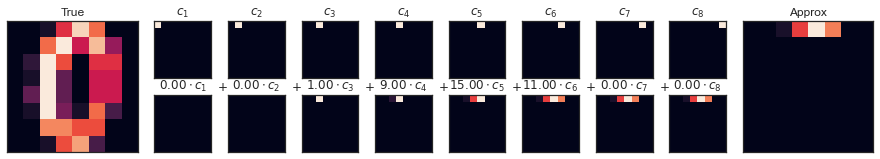

In [57]:
from sklearn.datasets import load_digits

digits = load_digits()
sns.set_style('white')

fig = plot_pca_components(digits.data[10],
                          show_mean=False)

#fig.savefig('figures/05.09-digits-pixel-components.png')

The upper row of panels shows the individual pixels, and the lower row shows the cumulative contribution of these pixels to the construction of the image. Using only eight of the pixel-basis components, we can only construct a small portion of the 64-pixel image. Were we to continue this sequence and use all 64 pixels, we would recover the original image.

But the pixel-wise representation is not the only choice of basis. We can also use other basis vectors, which each contain some pre-defined contribution from each pixel, and write something like

$$image(x)=mean+x1⋅(basis 1)+x2⋅(basis 2)+x3⋅(basis 3)⋯$$

PCA can be thought of as a process of choosing optimal basis functions, such that adding together just the first few of them is enough to suitably reconstruct the bulk of the elements in the dataset. The principal components, which act as the low-dimensional representation of our data, are simply the coefficients that multiply each of the elements in this series. This figure shows a similar depiction of reconstructing this digit using the mean plus the first eight PCA basis functions:


# Digits PCA Components

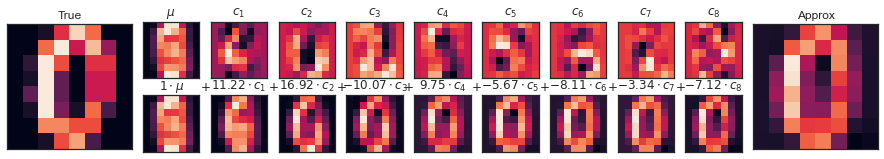

In [58]:
pca = PCA(n_components=8)
Xproj = pca.fit_transform(digits.data)
sns.set_style('white')
fig = plot_pca_components(digits.data[10], Xproj[10],
                          pca.mean_, pca.components_)

#fig.savefig('figures/05.09-digits-pca-components.png')

Unlike the pixel basis, the PCA basis allows us to recover the salient features of the input image with just a mean plus eight components! The amount of each pixel in each component is the corollary of the orientation of the vector in our two-dimensional example. This is the sense in which PCA provides a low-dimensional representation of the data: it discovers a set of basis functions that are more efficient than the native pixel-basis of the input data.

## Choosing the number of components
A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

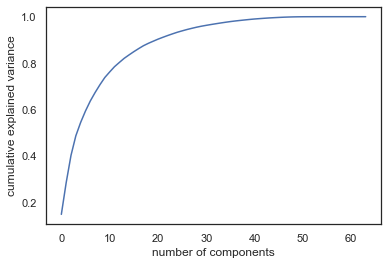

In [59]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 64-dimensional variance is contained within the first NN components. For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance. Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.



# PCA as Noise Filtering

PCA can also be used as a filtering approach for noisy data. The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise. So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

Let's see how this looks with the digits data. First we will plot several of the input noise-free data:

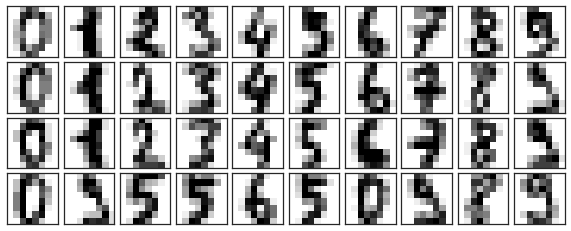

In [60]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Now lets add some random noise to create a noisy dataset, and re-plot it:

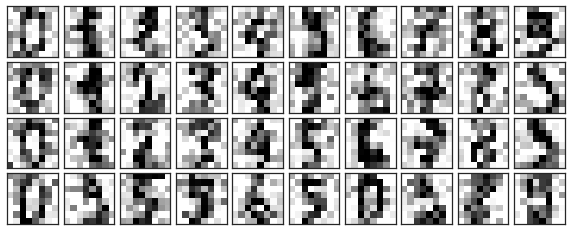

In [61]:
np.random.seed(99)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)


It's clear by eye that the images are noisy, and contain spurious pixels. Let's train a PCA on the noisy data, requesting that the projection preserve 50% of the variance:

In [62]:
pca = PCA(0.5).fit(noisy)  # try different values in place of 0.50
pca.n_components_

12

Here 50% of the variance amounts to 12 principal components. Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits:

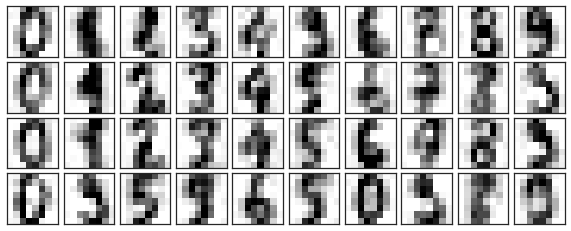

In [63]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.

# Example: Eigenfaces
Earlier we explored an example of using a PCA projection as a feature selector for facial recognition with a support vector machine (see In-Depth: Support Vector Machines). Here we will take a look back and explore a bit more of what went into that. Recall that we were using the Labeled Faces in the Wild dataset made available through Scikit-Learn:

In [64]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)
faces.data.shape

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


(1348, 2914)

Let's take a look at the principal axes that span this dataset.

In [65]:
pca = PCA(150)
pca.fit(faces.data)
pca.n_components_

150

In this case, it can be interesting to visualize the images associated with the first several principal components (these components are technically known as "eigenvectors," so these types of images are often called "eigenfaces"). As you can see in this figure, they are as creepy as they sound:

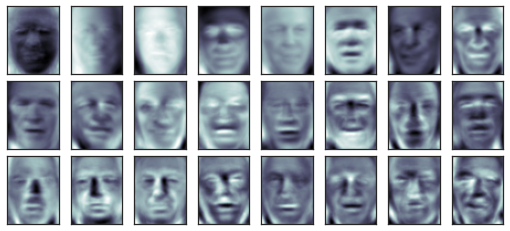

In [66]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

The results are very interesting, and give us insight into how the images vary: for example, the first few eigenfaces (from the top left) seem to be associated with the angle of lighting on the face, and later principal vectors seem to be picking out certain features, such as eyes, noses, and lips. Let's take a look at the cumulative variance of these components to see how much of the data information the projection is preserving:

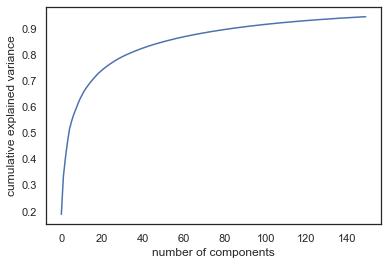

In [67]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

We see that these 150 components account for just over 90% of the variance. That would lead us to believe that using these 150 components, we would recover most of the essential characteristics of the data. To make this more concrete, we can compare the input images with the images reconstructed from these 150 components:

In [68]:
# Compute the components and projected faces
pca = PCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

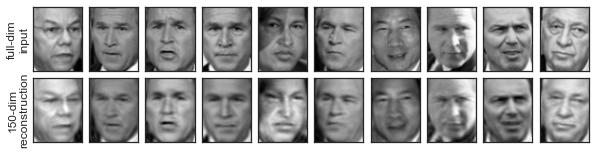

In [69]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

The top row here shows the input images, while the bottom row shows the reconstruction of the images from just 150 of the ~3,000 initial features. This visualization makes clear why the PCA feature selection used in In-Depth: Support Vector Machines was so successful: although it reduces the dimensionality of the data by nearly a factor of 20, the projected images contain enough information that we might, by eye, recognize the individuals in the image. What this means is that our classification algorithm needs to be trained on 150-dimensional data rather than 3,000-dimensional data, which depending on the particular algorithm we choose, can lead to a much more efficient classification.

# Compared with T-SNE
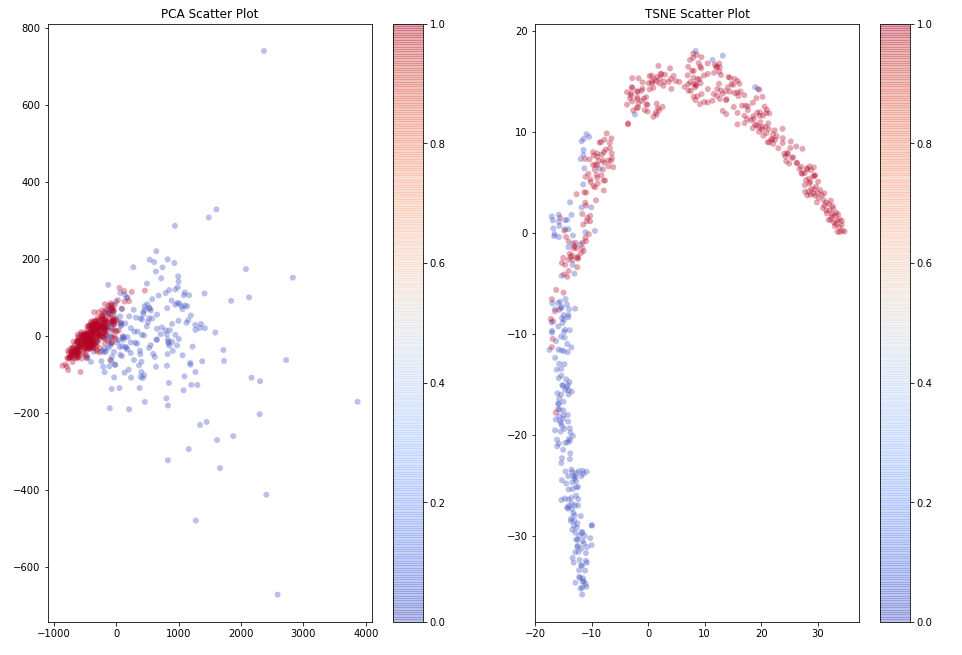
As one can see from these high-level plots, even though PCA does quite a decent job of visualising our two target clusters ( M for Malignant and B for Benign - cheating a bit here with the labels), the visuals in TSNE is much more obvious in terms of the demarcation in the target.

# STANDARDISATION AND VISUALISATION
Let's now try scaling (or standardising) our features and see if we can get even more obvious/intuitive clusters in our plots.

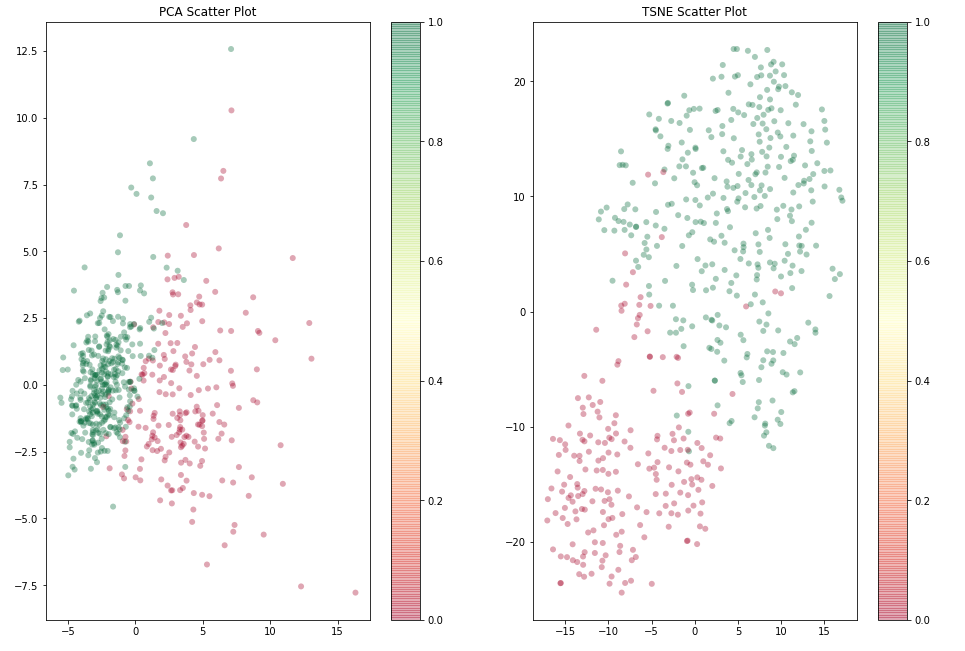

Even if you use the same dataset it depends on you are typology of preprocessing your datasets

# Principal Component Analysis Summary
In this section we have discussed the use of principal component analysis for dimensionality reduction, for visualization of high-dimensional data, for noise filtering, and for feature selection within high-dimensional data. Because of the versatility and interpretability of PCA, it has been shown to be effective in a wide variety of contexts and disciplines. Given any high-dimensional dataset, I tend to start with PCA in order to visualize the relationship between points (as we did with the digits), to understand the main variance in the data (as we did with the eigenfaces), and to understand the intrinsic dimensionality (by plotting the explained variance ratio). Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data.

PCA's main weakness is that it tends to be highly affected by outliers in the data. For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components. Scikit-Learn contains a couple interesting variants on PCA, including RandomizedPCA and SparsePCA, both also in the sklearn.decomposition submodule. RandomizedPCA, which we saw earlier, uses a non-deterministic method to quickly approximate the first few principal components in very high-dimensional data, while SparsePCA introduces a regularization term (see In Depth: Linear Regression) that serves to enforce sparsity of the components.

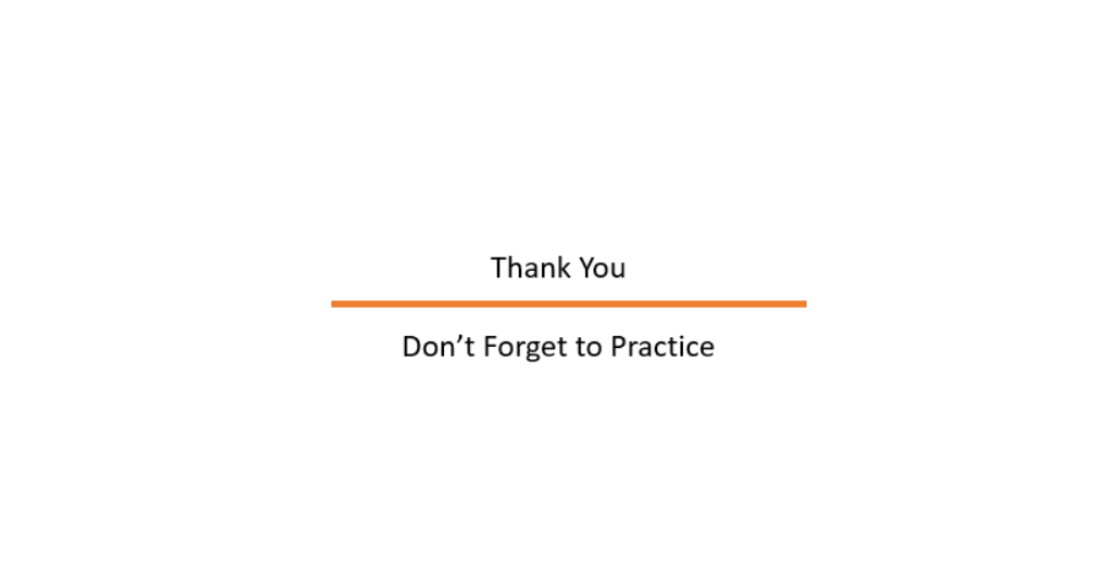